Michael Ersevim - Activity # 7, page 207
Wow, this particular activity was a comedy of errors for me. From the very beginning, I was using the author's repo, NOT the publisher's (Packt). Getting functions to work was very difficult as well, and the syntax for checking tables and children was nearly impossible. 

In [5]:
cd C:\Users\mersevim\DSC540\Data-Wrangling-with-Python\Chapter05\Activity07

C:\Users\mersevim\DSC540\Data-Wrangling-with-Python\Chapter05\Activity07


In [6]:
from bs4 import BeautifulSoup #needed
import codecs #learned from Teams chat - was getting error before
import pandas as pd #needed

In [7]:
url = "List of countries by GDP (nominal) - Wikipedia.htm" #snippet from the reading - wanted to see it work
soup = BeautifulSoup(url)
print(soup.prettify())

<html>
 <body>
  <p>
   List of countries by GDP (nominal) - Wikipedia.htm
  </p>
 </body>
</html>


C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\bs4\__init__.py:350: MarkupResemblesLocatorWarning: "List of countries by GDP (nominal) - Wikipedia.htm" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [8]:
fp = codecs.open("List of countries by GDP (nominal) - Wikipedia.htm","r",'utf-8') #reading cloned file and using codecs to avoid an error
soup = BeautifulSoup(fp, 'html.parser') #using bs4 to do the magic
fp.close #need to close if not using 'withopen'

<function BufferedReader.close>

In [14]:
all_tables = soup.find_all("table") #finding all tables
len(all_tables) #len gives total num of tables

9

In [15]:
data_table = soup.find("table", {"class": '"wikitable"|}'}) #THIS IS AS FAR AS I GOT ORIGINALLY. THE FORMATTING HERE WAS 
print(type(data_table)) # APPARENTLY IMPOSSIBLE FOR MY OLD EYES TO READ FROM THE BOOK AND DUPLICATE.

<class 'bs4.element.Tag'>


In [16]:
sources = data_table.tbody.findAll('tr', recursive=False)[0] #defines sources of the data (first element '[0]')
sources_list = [td for td in sources.findAll('td')] #creates the list for the 3 sources
print(len(sources_list)) #counts them

3


In [17]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False) #defines data (second element '[1]')

In [18]:
data_tables = [] #defines a dictionary for the tables
for td in data:
    data_tables.append(td.findAll('table')) #appends them to the dictionary

In [19]:
len(data_tables) #how many tables

3

In [20]:
source_names = [source.findAll('a')[0].getText() for source in sources_list] #uses tag of 'a' to find source names
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [21]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')] #double index looks for 'thead' in first list in 
#first table: [0][0], then the tag 'th'
header1

['Rank', 'Country', 'GDP(US$MM)']

In [22]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:] #finds data body from tag 'tbody'
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1] #iterates through choosing rows
df1 = pd.DataFrame(data_rows1, columns=header1) # makes the dataframe and appends the header
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [23]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')] #same as above, indexed for second headers
header2

['Rank', 'Country', 'GDP(US$MM)']

In [25]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:] #same as above, indexed for second data table
header2

In [26]:
#creates a function to iterate through getting and stripping text
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [27]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [28]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')] #third tima around the block
header3

['Rank', 'Country', 'GDP(US$MM)']

In [29]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:] #third table (i.e., index = '[2]')
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


Michael Ersevim - Activity # 8, page 233

In [33]:
import pandas as pd #needed

In [34]:
cd C:\Users\mersevim\DSC540\Data-Wrangling-with-Python\Lesson06\Activity08 # saved file here

C:\Users\mersevim\DSC540\Data-Wrangling-with-Python\Lesson06\Activity08


In [36]:
df= pd.read_csv("visit_data.csv")

In [49]:
df.head() #shows it loade and worked. Headers and data look ok

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [48]:
df.info() #technical info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [38]:
df2=df.drop_duplicates() # gets rid of duplicates

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 62.5+ KB


In [47]:
df2.describe() #apparently, there were no dups to drop

,id,visit
count,1000.000000,974.000000
mean,500.500000,1497.976386
std,288.819436,838.959460
min,1.000000,1.000000
25%,250.750000,794.500000
50%,500.500000,1477.000000
75%,750.250000,2224.250000
max,1000.000000,2998.000000


<AxesSubplot:>

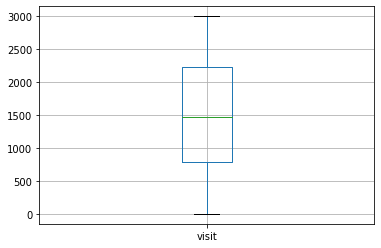

In [53]:
df2.boxplot(column='visit') # shows a fairly uniform dist

Looks like no duplicates of unique identifiers nor any outlier values. Looks like # of visits is
 pretty uniformly distributed b/t 1 - 3000

Michael Ersevim - Part # 3 from Cyberactive/Blackboard
3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):
a. Name, Address, City, State, Zip, Phone Number
b. Add at least 10 rows of data and submit your code with a query generating your results.

In [54]:
import sqlite3

In [55]:
# this creates the table structure and field names
query = """
CREATE TABLE part3
(name VARCHAR(30),
address VARCHAR(30),
city VARCHAR(30),
state VARCHAR(30),
zip VARCHAR(5),
phone INTEGER);"""

In [56]:
con = sqlite3.connect('mydata.sqlite') #command to connect to SQLite3
con.execute(query)

In [57]:
con.commit() #runs/saves the step

In [61]:
#made up data for the exercise
data = [('Michael','Dana', 'Pawtucket', 'Rhode Island', '02860', '4017272356'),
       ('Mark','Smith', 'Toledo', 'Ohio', '43521', '3105486977'),
       ('Billy','Kidd', 'Larson', 'Texas', '65233', '6504672213'),
       ('John','Hemmer', 'Franklin', 'Illinois', '32054', '3408987144'),
       ('Frank','Chotte', 'West Pawlet', 'Vermont', '00587', '8016235513'),
       ('Kimberly','Foley', 'Naugatuck', 'Connecticut', '06155', '8604653123'),
       ('Michelle','Nash', 'Providence', 'Rhode Island', '02910', '4017270399'),
       ('Laura','Foyle', 'Block Island', 'Rhode Island', '02440', '4017273177'),
       ('Chris','Pratt', 'Worcester', 'Massachusettes', '07881', '6017398104'),
       ('Matt','Olson', 'Portland', 'Maine', '03568', '3014659874')]

In [64]:
stmt = "INSERT INTO part3 VALUES(?,?,?,?,?,?)" #Puts the data in order

In [65]:
con.executemany(stmt, data) # executes the putting the data in

In [67]:
con.commit() #runs/saves the step

In [68]:
cursor = con.execute('select * from part3') #simple select all query
rows = cursor.fetchall()

In [69]:
rows #displays the list of the Select statement


[('Michael', 'Dana', 'Pawtucket', 'Rhode Island', '02860', 4017272356),
 ('Mark', 'Smith', 'Toledo', 'Ohio', '43521', 3105486977),
 ('Billy', 'Kidd', 'Larson', 'Texas', '65233', 6504672213),
 ('John', 'Hemmer', 'Franklin', 'Illinois', '32054', 3408987144),
 ('Frank', 'Chotte', 'West Pawlet', 'Vermont', '00587', 8016235513),
 ('Kimberly', 'Foley', 'Naugatuck', 'Connecticut', '06155', 8604653123),
 ('Michelle', 'Nash', 'Providence', 'Rhode Island', '02910', 4017270399),
 ('Laura', 'Foyle', 'Block Island', 'Rhode Island', '02440', 4017273177),
 ('Chris', 'Pratt', 'Worcester', 'Massachusettes', '07881', 6017398104),
 ('Matt', 'Olson', 'Portland', 'Maine', '03568', 3014659874)]